In [1]:
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [134]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

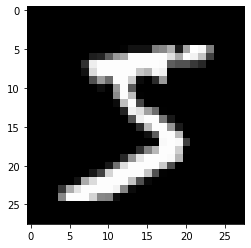

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0

x_test = x_test/255.0
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

<Figure size 432x288 with 0 Axes>

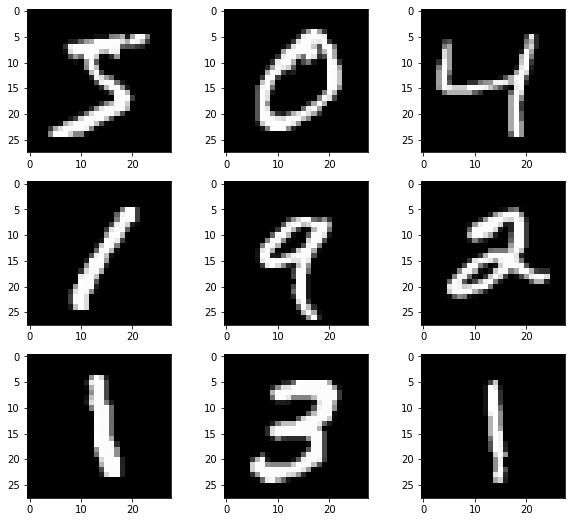

In [4]:
plt.gray()
plt.figure(figsize = (10,9))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])

In [8]:
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)
print(X_train.shape)
print(X_test.shape)


(60000, 784)
(10000, 784)


In [9]:
import numpy as np

def random_sample(X, k):
    '''
    Take a random sample of a list X to generate the initial centroids
    '''
    return X[np.random.choice(X.shape[0], k, replace=False),:]

def pairwise_distances_argmin(X, y):
    '''
    Return the closest centroids to the point y
    X are all the centroids
    '''
    indices = np.empty(X.shape[0], dtype=np.intp)
    for i in range(len(X)):
        indices[i] = np.linalg.norm(X[i,np.newaxis] - y, axis=1).argmin()
    return indices

In [14]:
def kmeans_iteration(X, m,distance=pairwise_distances_argmin):
    '''
    One iteration of Lloyd's algorithm
    '''
    clusters = distance(X, m)
    centroids = np.empty(m.shape)
    for i in range(len(m)):
        centroids[i] = np.mean(X[clusters == i], axis=0)
    return centroids, clusters

def kmeans(X, k,m=None,distance=pairwise_distances_argmin):
    '''
    Run K_means until we are close to convergence
    '''
    if m is None : m = random_sample(X, k)
    while True:
        new_m, clusters = kmeans_iteration(X, m,distance)
        if np.isclose(m, new_m).all():
            break
        m = new_m
    return new_m, clusters

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
import seaborn as sns

plt.style.use('ggplot')
sns.set_style('whitegrid') # some graphic stuff use in jupyter in python3
rc('figure', figsize=(6, 4))
cmap = cm.get_cmap('rainbow') # colors for cluster

def plot_clusters(X, m, clusters):
    '''
    Plot all the pointsi n the clusters with respective colors
    '''
    k = len(m)
    for i in range(k):
        group = X[clusters == i]
        plt.scatter(group[:,0], group[:,1], marker='.', color=cmap(i / k))
        plt.scatter(m[i,0], m[i,1], marker='s',lw=2,color=cmap(i / k),edgecolor='k')
    plt.show()

In [11]:
def classify_cluster(clusters,centroids,X):
    """
    Assigns a digit label to each cluster.
    Cluster is a list of clusters containing labelled datapoints.
    IMPORTANT: this function depends on clusters and centroids being in the same order.
    """
    labelled_centroids = []
    clusters_list = {c: [] for c in range(len(centroids))}
    for i in range(len(clusters)):
        clusters_list[clusters[i]].append((X[i][0],X[i][1]))
    clusters_final = list(clusters_list.values())
    for i in range(len(clusters_final)):
        labels = list(map(lambda x: x[0], clusters_final[i]))
        # pick the most common label
        most_common = max(set(labels), key=labels.count)
        centroid = (most_common, centroids[i])
        labelled_centroids.append(centroid)
    return labelled_centroids

def classify_digit(digit, labelled_centroids):
    """
    given an unlabelled digit represented by a vector and a list of
    labelled centroids [(label,vector)], determine the closest centroid
    and thus classify the digit.
    """
    mindistance = float("inf")
    for (label, centroid) in labelled_centroids:
        distance = np.linalg.norm(centroid - digit)
        if distance < mindistance:
            mindistance = distance
            closest_centroid_label = label
    return closest_centroid_label

def get_error_rate(digits,labelled_centroids):
    """
    classifies a list of labelled digits. returns the error rate.
    """
    classified_incorrect = 0
    for (label,digit) in digits:
        classified_label = classify_digit(digit, labelled_centroids)
        if classified_label != label:
            classified_incorrect +=1
    error_rate = classified_incorrect / float(len(digits))
    return error_rate

# Train


In [99]:
k=15
sigma = 3
X=X_train
m, clusters = kmeans(X, k)


In [ ]:
plt.title('Results of Lloyds algorithm for {} clusters, with standard deviation {}' .format(k,sigma))
plot_clusters(X, m, clusters)

#Without cluster classification
plt.plot(X[:,0], X[:,1],
         linestyle='', marker='.',
         color=cmap(0.2), markeredgecolor=cmap(0.25))
plt.title('Blops for {} clusters, with standard deviation {} without identification' .format(k,sigma))
plt.show()

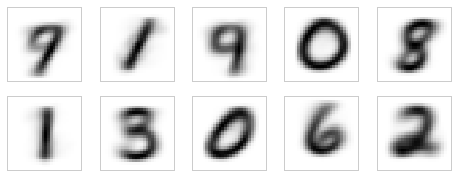

In [17]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = m.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(2)
df = pca.fit_transform(X)

7814


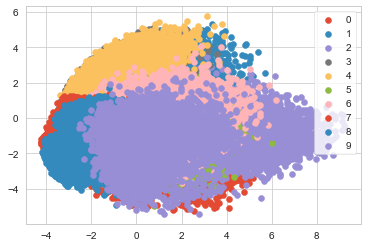

In [91]:
c=clusters.astype('int32')
u_labels = np.unique(c)
for i in u_labels:
    plt.scatter(df[c == i , 0] , df[c == i , 1] , label = i)
plt.legend()
plt.show()

In [25]:
df

array([[ 0.48596806, -1.22616537],
       [ 3.96751341, -1.15631247],
       [-0.20332925,  1.53792035],
       ...,
       [-0.69825737,  0.62777136],
       [ 0.51217443, -0.02193467],
       [-0.68012511, -0.09694713]])

In [31]:
df.shape

(60000, 2)

In [ ]:
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)
print(X_train.shape)
print(X_test.shape)

In [33]:
X_train.shape

(60000, 784)

In [34]:
x_train.shape

(60000, 28, 28)

In [ ]:
dfx = x_train.reshape(len(x_train)

In [35]:
len(x_train)

60000

In [38]:
mean = np.mean(X, axis = 0)
X_std = (X - mean)
cov_mat = np.cov(X_std, rowvar = 0)


In [39]:
eigen_values_sorted = np.argsort(-eig_vals)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
X_std_pca = X_std.dot(eig_vecs[:,eigen_values_sorted[:2]])

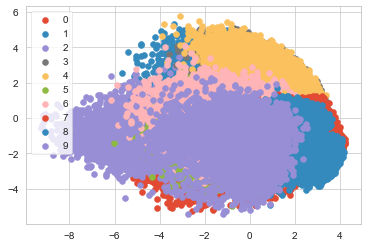

In [40]:
c=clusters.astype('int32')
u_labels = np.unique(c)
for i in u_labels:
    plt.scatter(X_std_pca[c == i , 0] , X_std_pca[c == i , 1] , label = i)
plt.legend()
plt.show()

In [41]:
cov_mat.shape

(784, 784)

In [132]:
y_train = y_train/255.0
y_train = y_train.reshape(len(x_train),-1)

In [135]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [136]:
clusters

array([ 3,  9,  4, ...,  7,  0, 14], dtype=int64)

In [138]:
len(clusters)

60000

In [139]:
from collections import Counter
  
def group_list2(lst):
      
    return list(zip(Counter(lst).keys(), Counter(lst).values()))


In [140]:
group_list2(list(clusters))

[(3, 4139),
 (9, 2036),
 (4, 4696),
 (1, 3767),
 (10, 6513),
 (2, 4339),
 (5, 5034),
 (14, 4393),
 (6, 5001),
 (0, 3558),
 (12, 5379),
 (7, 4546),
 (13, 2138),
 (8, 2676),
 (11, 1785)]

In [141]:
group_list2(list(y_train))

[(5, 5421),
 (0, 5923),
 (4, 5842),
 (1, 6742),
 (9, 5949),
 (2, 5958),
 (3, 6131),
 (6, 5918),
 (7, 6265),
 (8, 5851)]